In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. z-score
- Z-score与原始分数的分布形状相同

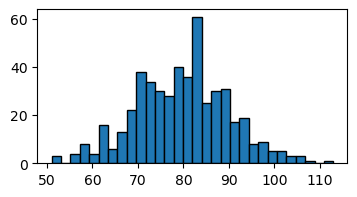

In [89]:
# create a random score list
population_mean = 80
population_std = 10
rnd_array = np.random.normal(population_mean, population_std, 500).astype('int')
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(rnd_array, edgecolor='black', bins=30)
plt.show()

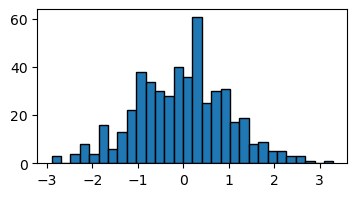

In [90]:
# standard normal distribution
standard_form = (rnd_array - population_mean) / population_std
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(standard_form, edgecolor='black', bins=30)
plt.show()

### 2. t-score

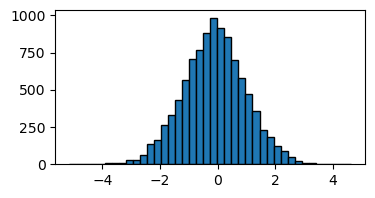

In [91]:
sample_size = 20
df = pd.DataFrame(columns=['t_score'])
for i in range(10000):
    sample = np.random.choice(rnd_array,sample_size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    t = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
    df.loc[len(df)] = t
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(df, edgecolor='black', bins=40)
plt.show()

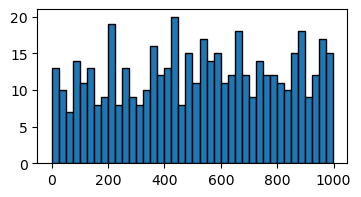

In [92]:
# 假如初识数据不是正态分布，也可通过t-score转化成正态分布
rnd_array_2 = np.random.randint(0,1000, size=500)
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(rnd_array_2, edgecolor='black', bins=40)
plt.show()

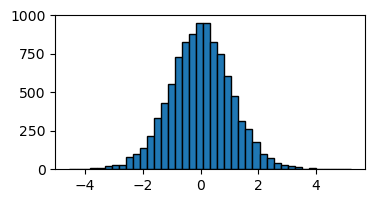

In [93]:
population_mean = np.mean(rnd_array_2)
sample_size = 20
df_2 = pd.DataFrame(columns=['t_score'])
for i in range(10000):
    sample = np.random.choice(rnd_array_2,sample_size)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    t = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
    df_2.loc[len(df_2)] = t
fig = plt.figure(figsize=(4,2))
ax = fig.subplots()
ax.hist(df_2, edgecolor='black', bins=40)
plt.show()

## 单样本t检测

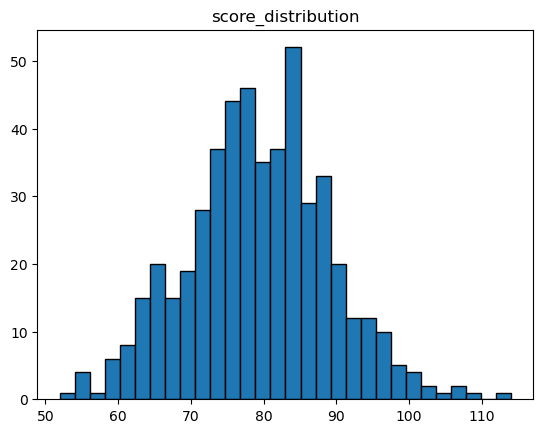

In [208]:
# create data working hours
school_score = np.random.normal(80,10,500).astype(int)
fig = plt.figure()
ax1 = fig.subplots()
ax1.hist(school_score, edgecolor='black', bins=30)
ax1.set_title('score_distribution')
plt.show()

accept area: [-2.093024, 2.093024], sample_t_val = 0.030643
t-score_scipy = 0.029867, p-value_scipy = 0.976484


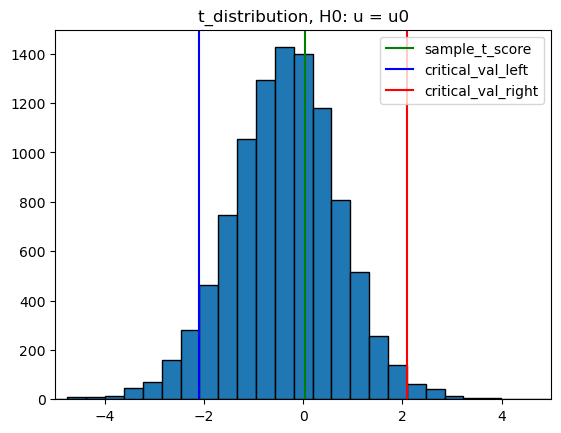

In [215]:
import scipy.stats as stats
from scipy.stats import t


def t_val(sample, population_mean):
    sample_size = len(sample)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample)
    t_score = (sample_mean - population_mean) / (sample_std / np.sqrt(sample_size))
    return t_score

# not exactly same as t distribution
def simulate_t_distribution(population):
    df = pd.DataFrame(columns=['t'])
    for i in range(10000):
        sample = np.random.choice(population, 20)
        sample_t = t_val(sample, 80)
        df.loc[len(df)] = sample_t
    return df


# H0: u = u0， 假设班级均分和年级均分无明显差异
sample_size = 20
alpha = 0.05  # significance level
df = sample_size - 1
class_score = np.random.choice(school_score, sample_size)  # sample
population_score_mean = 80
class_score_mean = np.mean(class_score)
class_score_std = np.std(class_score)

# Method-1: t-score of randomly pick sample in the accept area of t-distribution
# draw critical value on two sides of t distribution
t_distribution = simulate_t_distribution(school_score)
t_score = t_val(class_score, population_score_mean)  # randomly pick 20 scores
t_critical_val = t.ppf(q=1-alpha/2,df=df)  # 双边检验下的t界值
left_cv = -1 * abs(t_critical_val)
right_cv = abs(t_critical_val)
fig = plt.figure()
ax2 = fig.subplots()
ax2.hist(t_distribution, edgecolor='black', bins=30)
ax2.axvline(x = t_score, color = 'g', label = 'sample_t_score')
ax2.axvline(x = left_cv, color = 'b', label = 'critical_val_left')
ax2.axvline(x = right_cv, color = 'r', label = 'critical_val_right')
ax2.set_title('t_distribution, H0: u = u0')
ax2.set_xlim(-5,5)
ax2.legend(loc='best')
print('accept area: [%.6f, %.6f], sample_t_val = %.6f' % (left_cv, right_cv, t_score))

# Method-2: calculate the p-value
t_val_by_scipy, p_val_by_scipy = stats.ttest_1samp(class_score, popmean=80, alternative='two-sided')
print('t-score_scipy = %.6f, p-value_scipy = %.6f' % (t_val_by_scipy, p_val_by_scipy))
